In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import feather

# path to the data directory
#path = '/content/drive/My Drive/simPatterns'
#os.chdir(path)
#!ls
#os.listdir(path)

# number of groups (species, processes, ...)
n_classes = 1
# number of replicates (censuses, ...)
n_examples = 10

# rectangular observation window
xmin = 0
xmax = 1
ymin = 0
ymax = 1
tmin = 1000
tmax = 1500
window = [[tmin,tmax],[xmin, xmax], [ymin, ymax]]

# grid dimension
grid_nx = 128
grid_ny = 128
grid_nt = 10 #Check

In [2]:
# os.chdir('C:\\Users\\nicholas.clark\\Spatial_Research\\SiameseNetPPP-master\\simPatterns')
os.chdir('C:\\Users\\nicholas.clark\\OneDrive - West Point\\Desktop\\Spatial Research\\HawkesSim\\simdata')

In [3]:
# read data files: each point pattern is in a separate file 
# process = ["Poisson", "LGCP", "Thomas", "MatClust", "VarGamma", 
#            "Cauchy", "dppG", "dppC", "Strauss", "AreaInter"]
# sim_patterns = [None] * n_classes
# filename = [None] * n_examples
# for i in range(n_classes):
#     sim_patterns[i] = [None] * n_examples
#     for j in range(n_examples):
#         filename[j] = process[i] + str(j + 1) + ".feather"
#         df = feather.read_dataframe(filename[j])
#         sim_patterns[i][j] = df

In [3]:
process = ["hawkes"]
sim_patterns = [None]*n_classes
filename = [None]*n_examples
for i in range(n_classes):
    sim_patterns[i] = [None] * n_examples
    for j in range(n_examples):
        filename[j] = process[i] + str(j+1) + ".feather"
        df = feather.read_dataframe(filename[j])
        sim_patterns[i][j] = df

In [20]:
# from stppg import StdDiffusionKernel, HawkesLam, SpatialTemporalPointProcess
# from utils import plot_spatio_temporal_points, plot_spatial_intensity

In [21]:
#np.random.seed(0)
#np.set_printoptions(suppress=True)

# # parameters initialization
# mu     = .1
# kernel = StdDiffusionKernel(C=1., beta=1., sigma_x=.1, sigma_y=.1)
# lam    = HawkesLam(mu, kernel, maximum=1e+3)
# pp     = SpatialTemporalPointProcess(lam)

# # generate points
#points, sizes = pp.generate(
#    T=[0., 10.], S=[[-1., 1.], [-1., 1.]], 
#    batch_size=500, verbose=True)

# plot intensity of the process over the time
#plot_spatial_intensity(lam, points[0], S=[[0., 10.], [-1., 1.], [-1., 1.]],
#    t_slots=1000, grid_size=50, interval=50)

In [5]:
sim_patterns[0][1]['x'].max()

0.9227205943961124

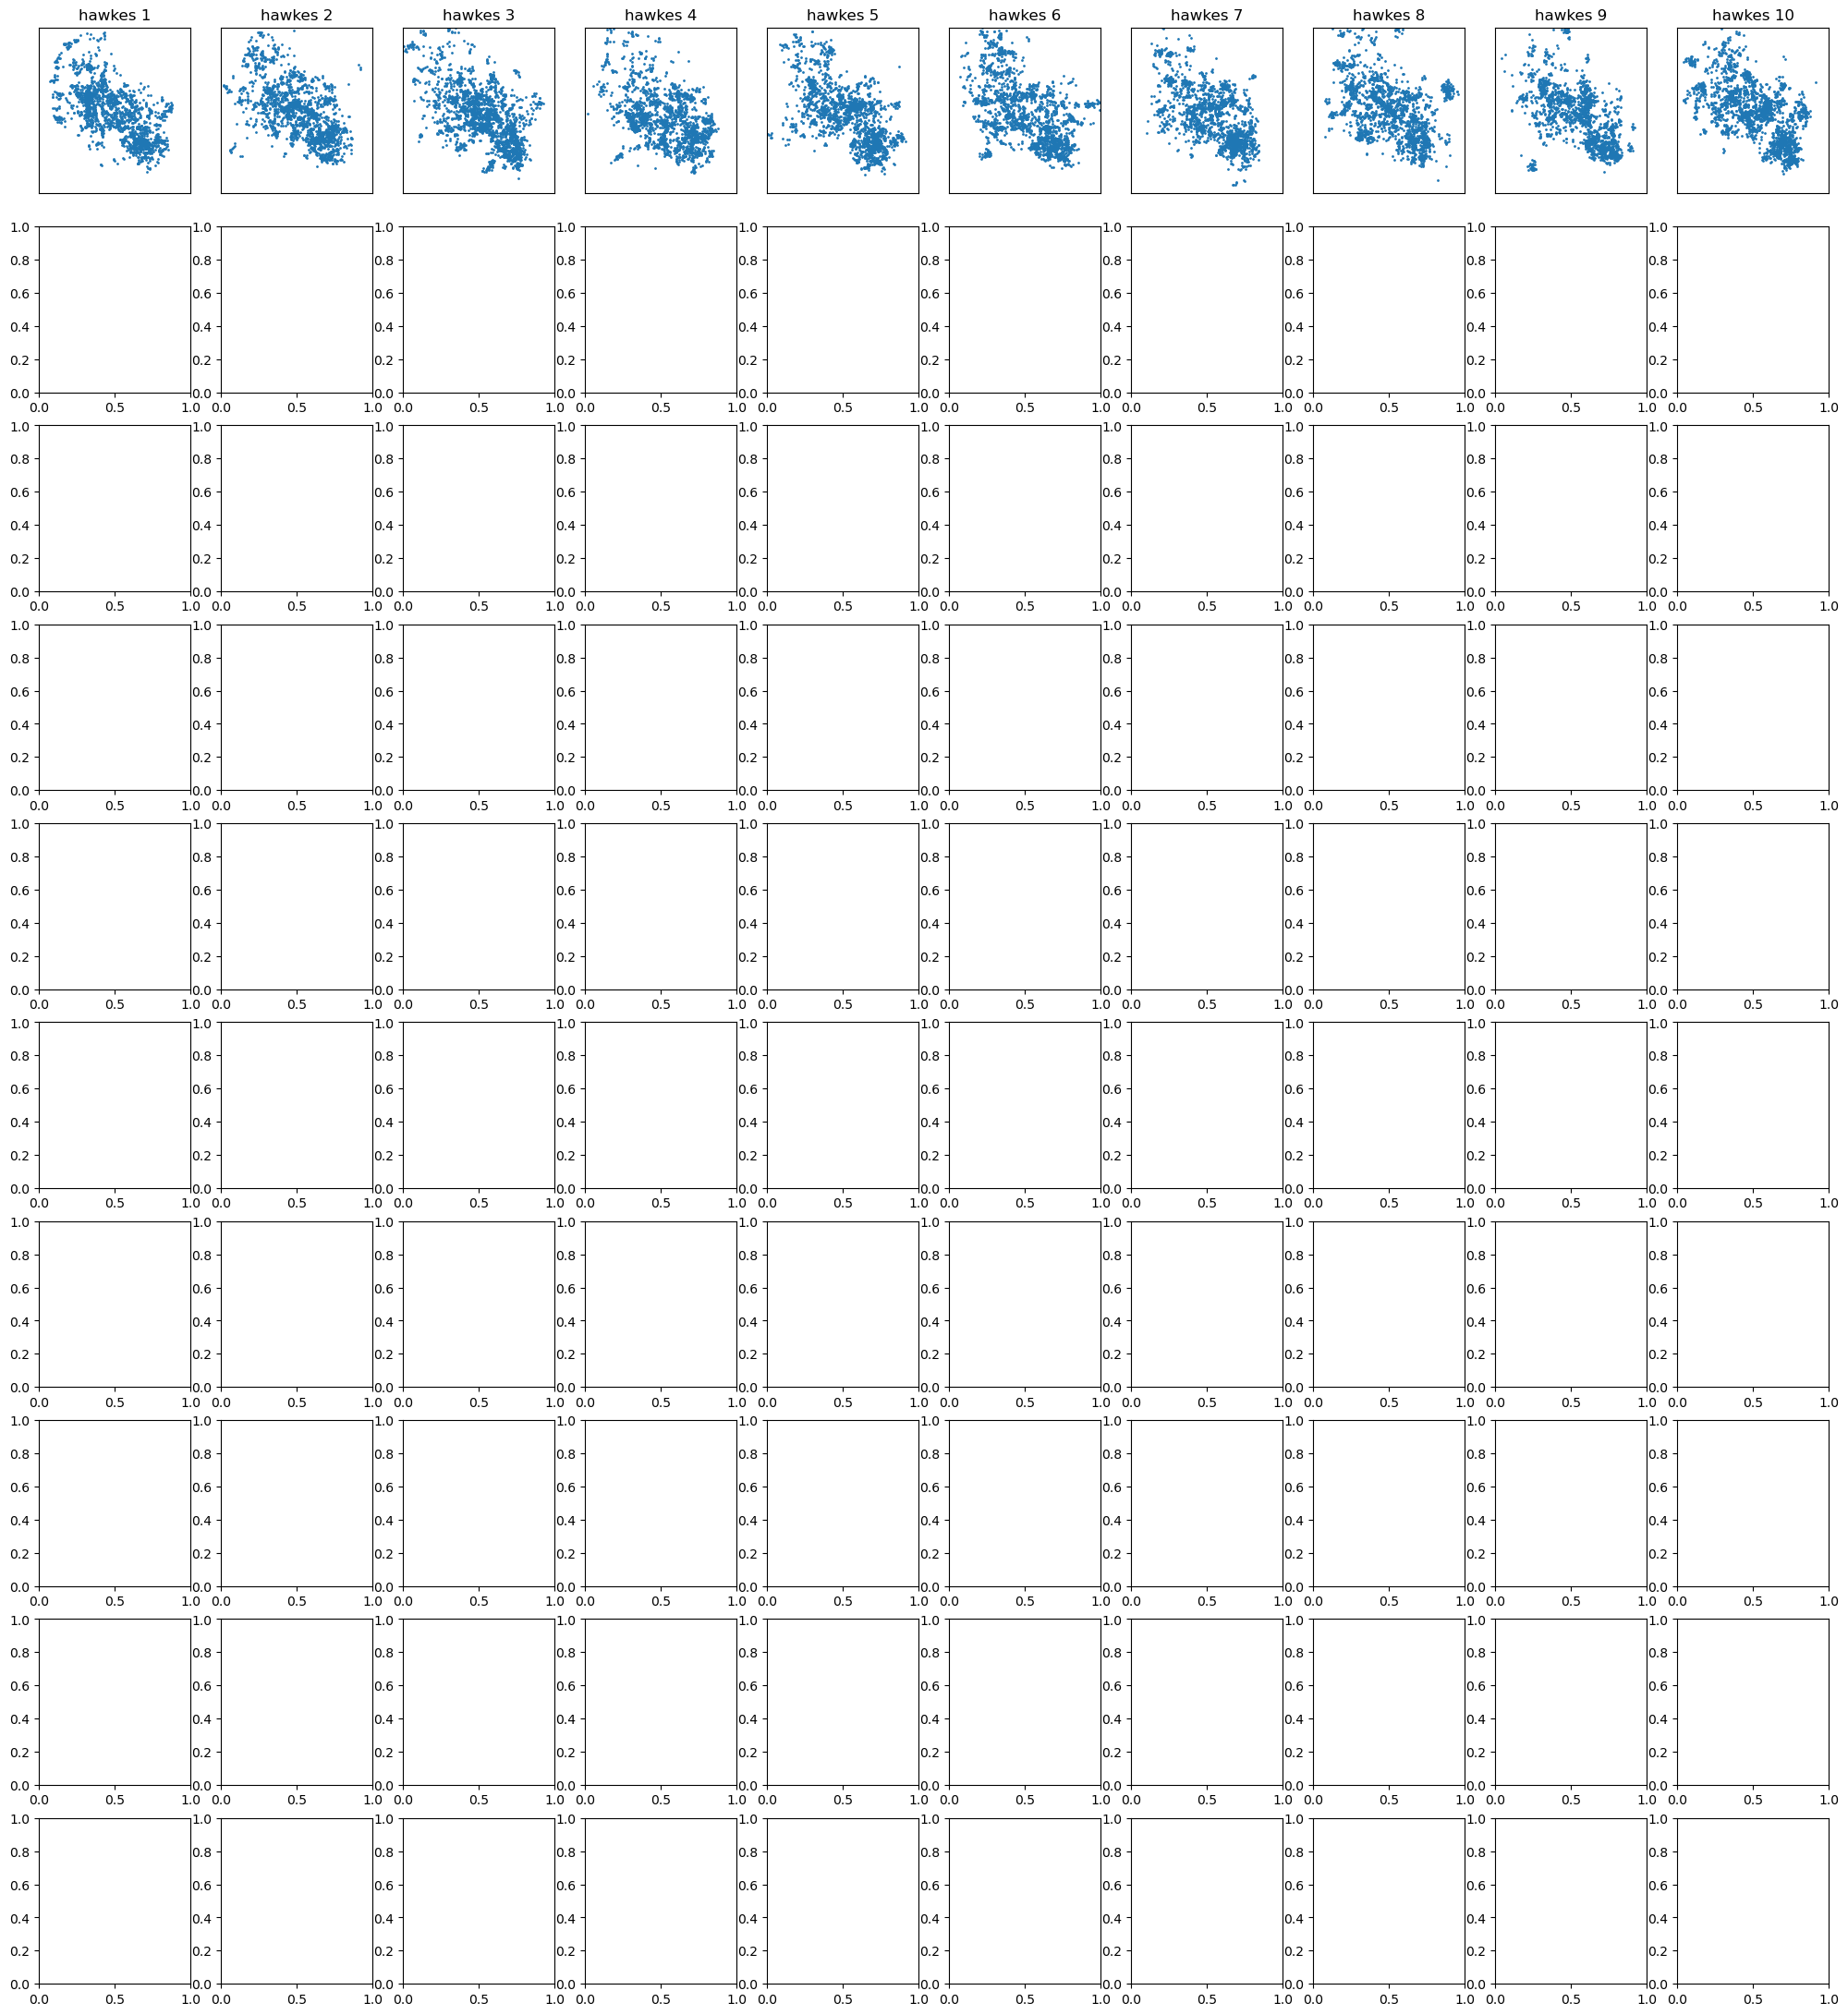

In [4]:
fig, axs = plt.subplots(10, 10, figsize=(25, 27.5))

for i in range(n_classes):
    for j in range(n_examples):
        axs[i,j].scatter(sim_patterns[i][j]['x'], sim_patterns[i][j]['y'], s=1)
        axs[i,j].set_title(process[i] + ' ' + str(j + 1))
        axs[i,j].set_xlim([0, 1])
        axs[i,j].set_ylim([0, 1])
    #axs[i, j].axis('off')
        axs[i,j].set_xticks([0, 1])
        axs[i,j].set_yticks([0, 1])
        axs[i,j].tick_params(axis='both', which='both',length=0, labelcolor='white')


array([[1.34822870e+03, 1.36229102e-01, 5.92252317e-01],
       [1.05614033e+03, 3.38358158e-01, 5.17536920e-01],
       [1.01847831e+03, 5.60699724e-01, 2.08104732e-01],
       ...,
       [1.40100314e+03, 3.40638199e-01, 7.70032822e-01],
       [1.04942990e+03, 3.26922911e-01, 5.90182946e-01],
       [1.41160096e+03, 2.99443499e-01, 7.64178101e-01]])

In [6]:
H, edges = np.histogramdd(np.array(sim_patterns[0][0]),bins=[grid_nt,grid_nx,grid_ny],range=window)


In [53]:
# def pattern2img(pp, nx, ny, window):
#     x = pp['x']
#     y = pp['y']
#     grid = np.histogram2d(x, y, bins=[nx, ny], range=window, density=False)[0]
#     return np.transpose(grid)

# sim_imgs = [None] * n_classes
# for i in range(n_classes):
#     sim_imgs[i] = [None] * n_examples
#     for j in range(n_examples):
#         sim_imgs[i][j] = pattern2img(sim_patterns[i][j], grid_nx, grid_ny, window)

# sim_imgs = np.asarray(sim_imgs)
# print(sim_imgs.shape)
# print(sim_imgs.mean())
# print(sim_imgs.max())

In [4]:
def pattern2img(pp,nt,nx,ny,window):
    H,grid = np.histogramdd(np.array(pp),bins = [nt,nx,ny], range = window,density=False)
    return np.transpose(H)

sim_imgs = [None]*n_classes
for i in range(n_classes):
    sim_imgs[i] = [None]*n_examples
    for j in range(n_examples):
        sim_imgs[i][j] = pattern2img(sim_patterns[i][j],grid_nt,grid_nx,grid_ny,window)
        
sim_imgs = np.asarray(sim_imgs)
print(sim_imgs.shape)
print(sim_imgs.mean())
print(sim_imgs.max()) #Play around (More than 40% of cells zero, consider enlarging)

(1, 10, 128, 128, 10)
0.011907958984375
8.0


In [12]:
sim_imgs[0][0][0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

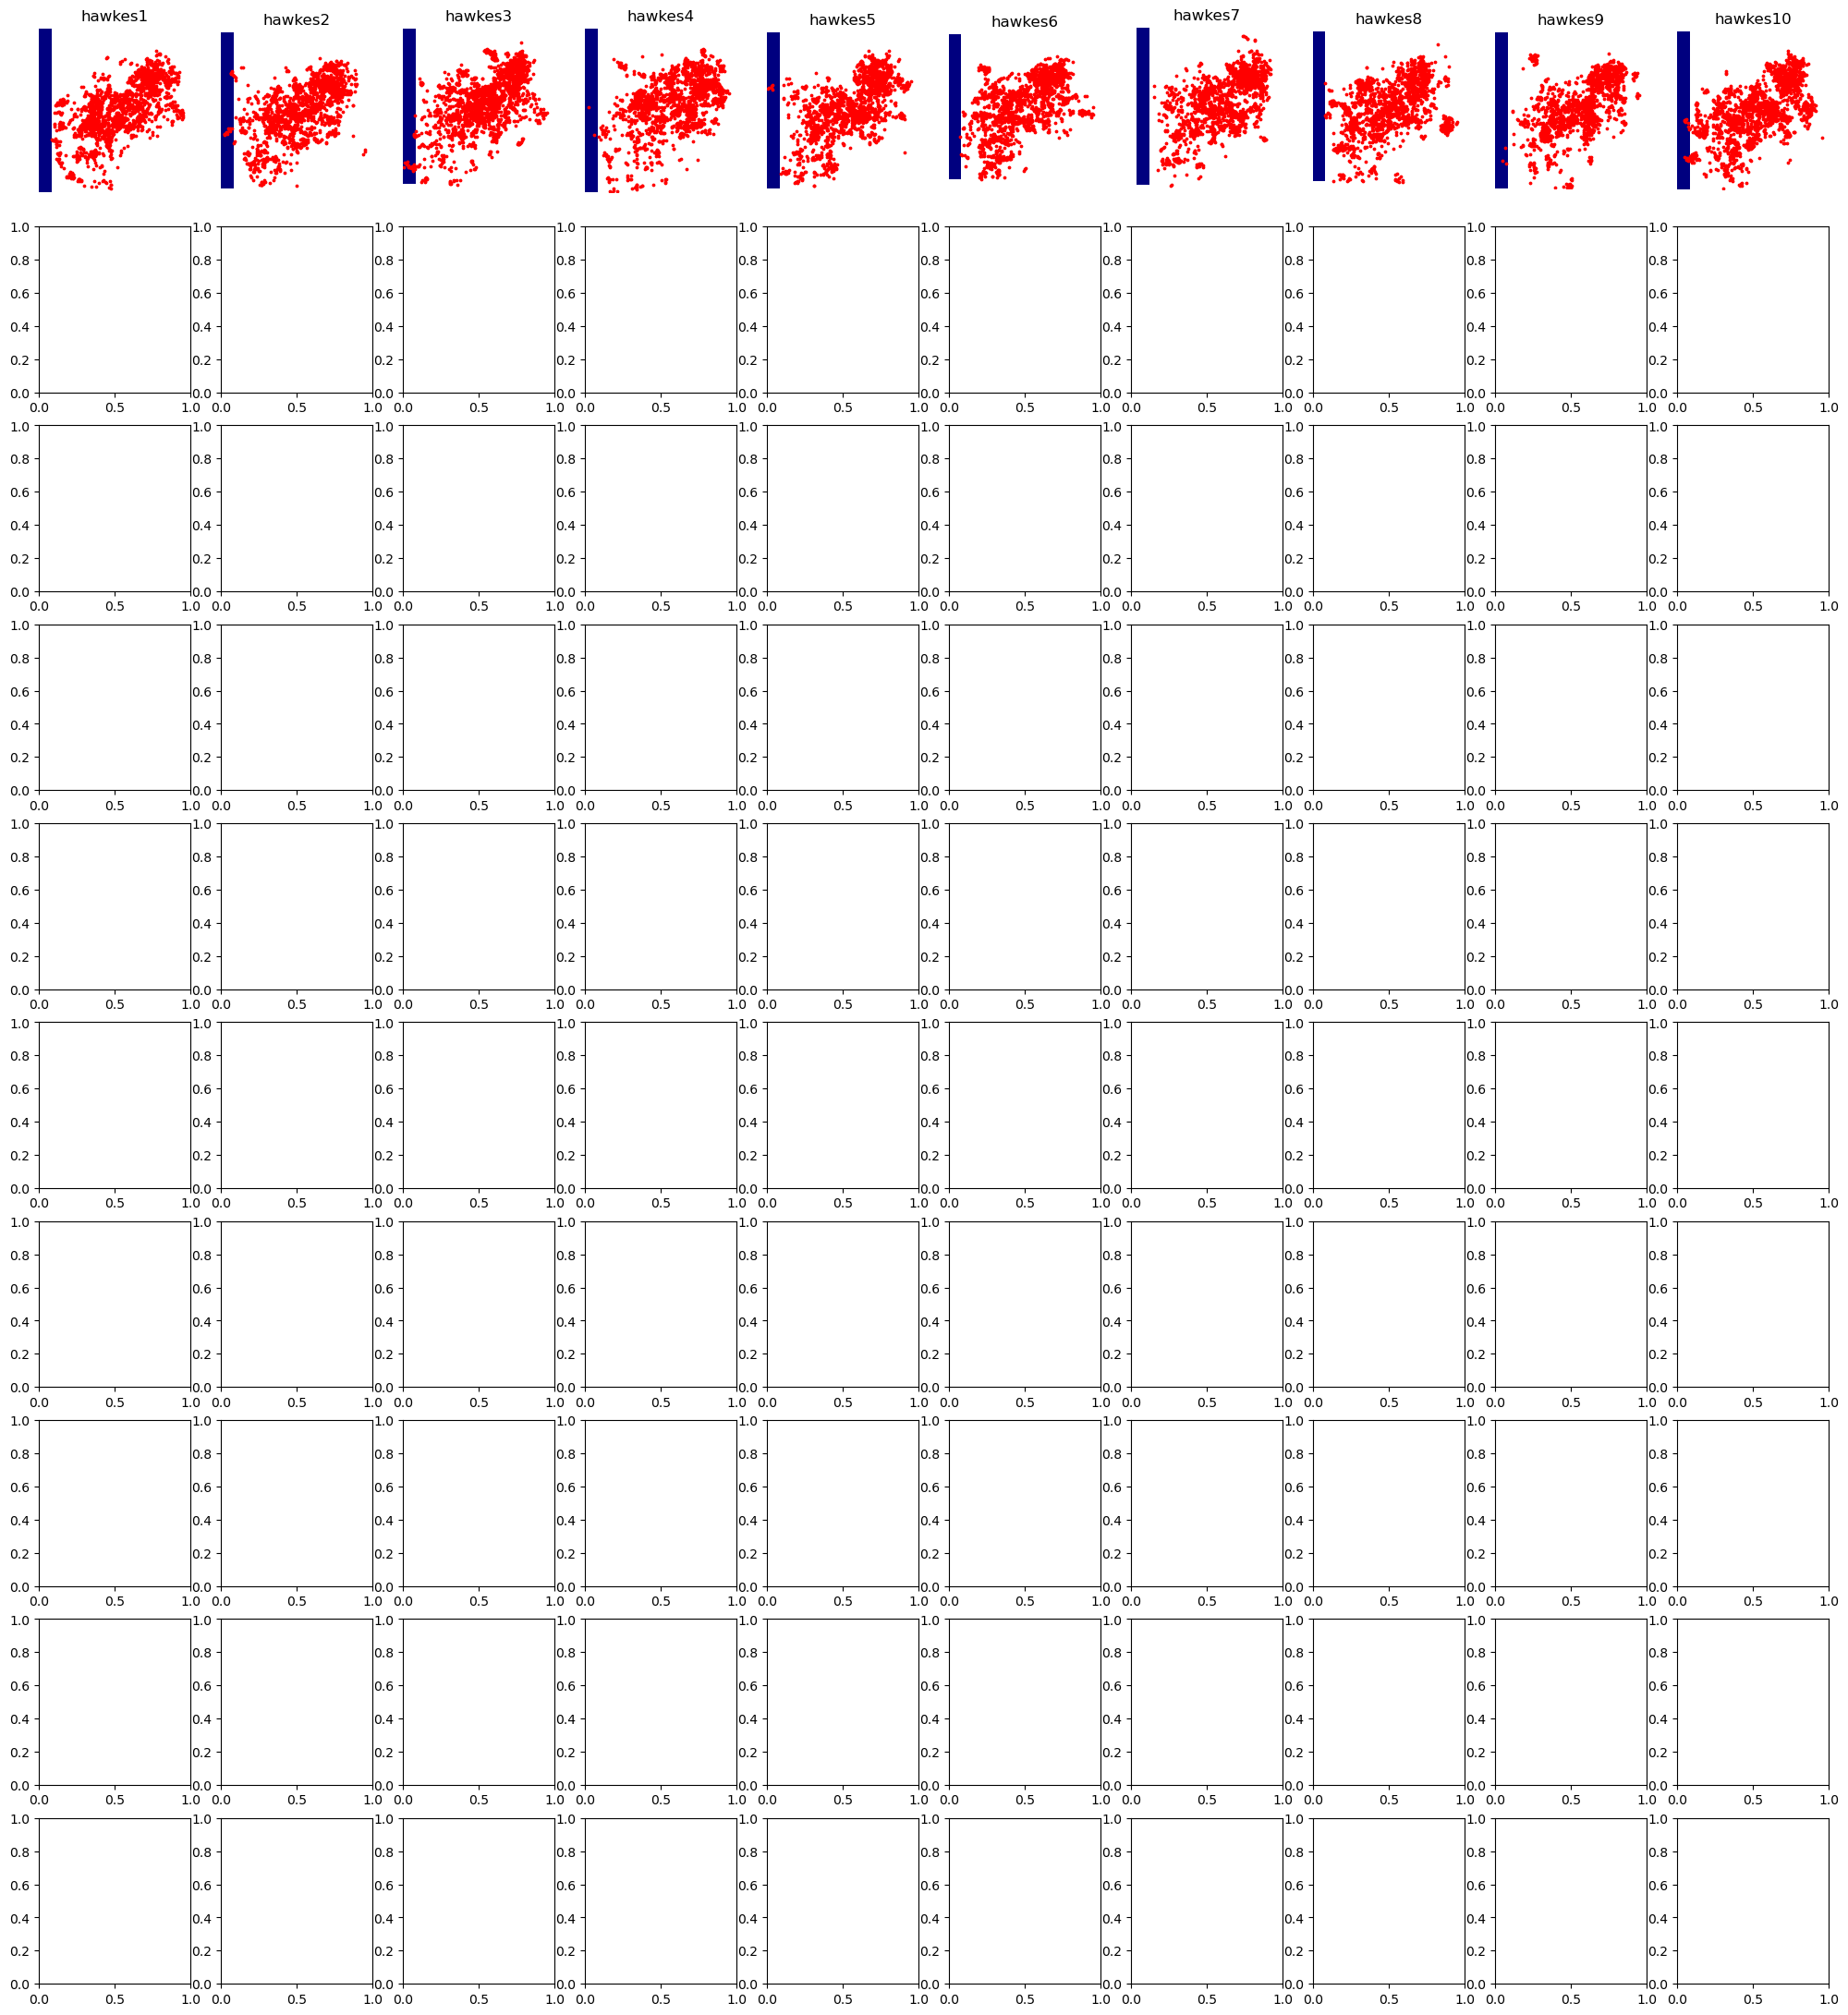

In [178]:
fig, axs = plt.subplots(10, 10, figsize=(25, 27.5))

for i in range(n_classes):
    for j in range(n_examples):
        axs[i, j].imshow(sim_imgs[0][i][j], vmin=0, vmax=sim_imgs.max(), cmap='jet')
        axs[i, j].scatter(sim_patterns[i][j]['x'] * grid_nx, 
                      sim_patterns[i][j]['y'] * grid_ny, s=3, color='red')
        axs[i, j].set_title(process[i] + str(j + 1))
        axs[i, j].axis('off')
#fig.savefig('simimgs.pdf', bbox_inches='tight')

In [20]:
# from rpy2.robjects.packages import importr
# import rpy2.robjects.packages as packages
# # load spatstat

# #from spatstat import *

# import pandas as pd
# from rpy2.robjects import pandas2ri
# pandas2ri.activate()

In [21]:
# import rpy2
# import rpy2.robjects as robjects

In [22]:
# from rpy2.robjects.packages import importr, data


In [23]:
# utils = importr('utils')
# base = importr('base')

In [24]:
# stats = importr('stats')

In [25]:
# spatstat = importr('spatstat.geom')

In [26]:
# spatstatcore = importr('spatstat.core')

In [27]:
# sim_rhos = [None] * n_classes
# sim_Ks = [None] * n_classes
# sim_Ks2 = [None] * n_classes
# r = np.arange(0, 0.15, 0.00025)
# for i in range(n_classes):
#     sim_rhos[i] = [None] * n_examples
#     sim_Ks[i] = [None] * n_examples
#     sim_Ks2[i] = [None] * n_examples
#     for j in range(n_examples):
#         pp = spatstat.ppp(sim_patterns[i][j]['x'], sim_patterns[i][j]['y'])
#         dd = spatstatcore.adaptive_density(pp)
#         sim_rhos[i][j] = np.array(dd.rx2('v'))
#         kk = spatstatcore.Kest(pp, r=r, correction='translation').rx2('trans') #Returns K(r) values across r
#         sim_Ks[i][j] = np.array(kk)
#         kk2 = spatstatcore.Kinhom(pp, dd, r=r, correction='translation').rx2('trans')
#     #kk2 = np.array(kk2)
#         sim_Ks2[i][j] = np.array(kk2)

# sim_rhos = np.asarray(sim_rhos)
# sim_Ks = np.asarray(sim_Ks)
# sim_Ks2 = np.asarray(sim_Ks2)

# print(sim_rhos.shape)
# print(sim_Ks.shape)

(1, 10, 128, 128)
(1, 10, 600)


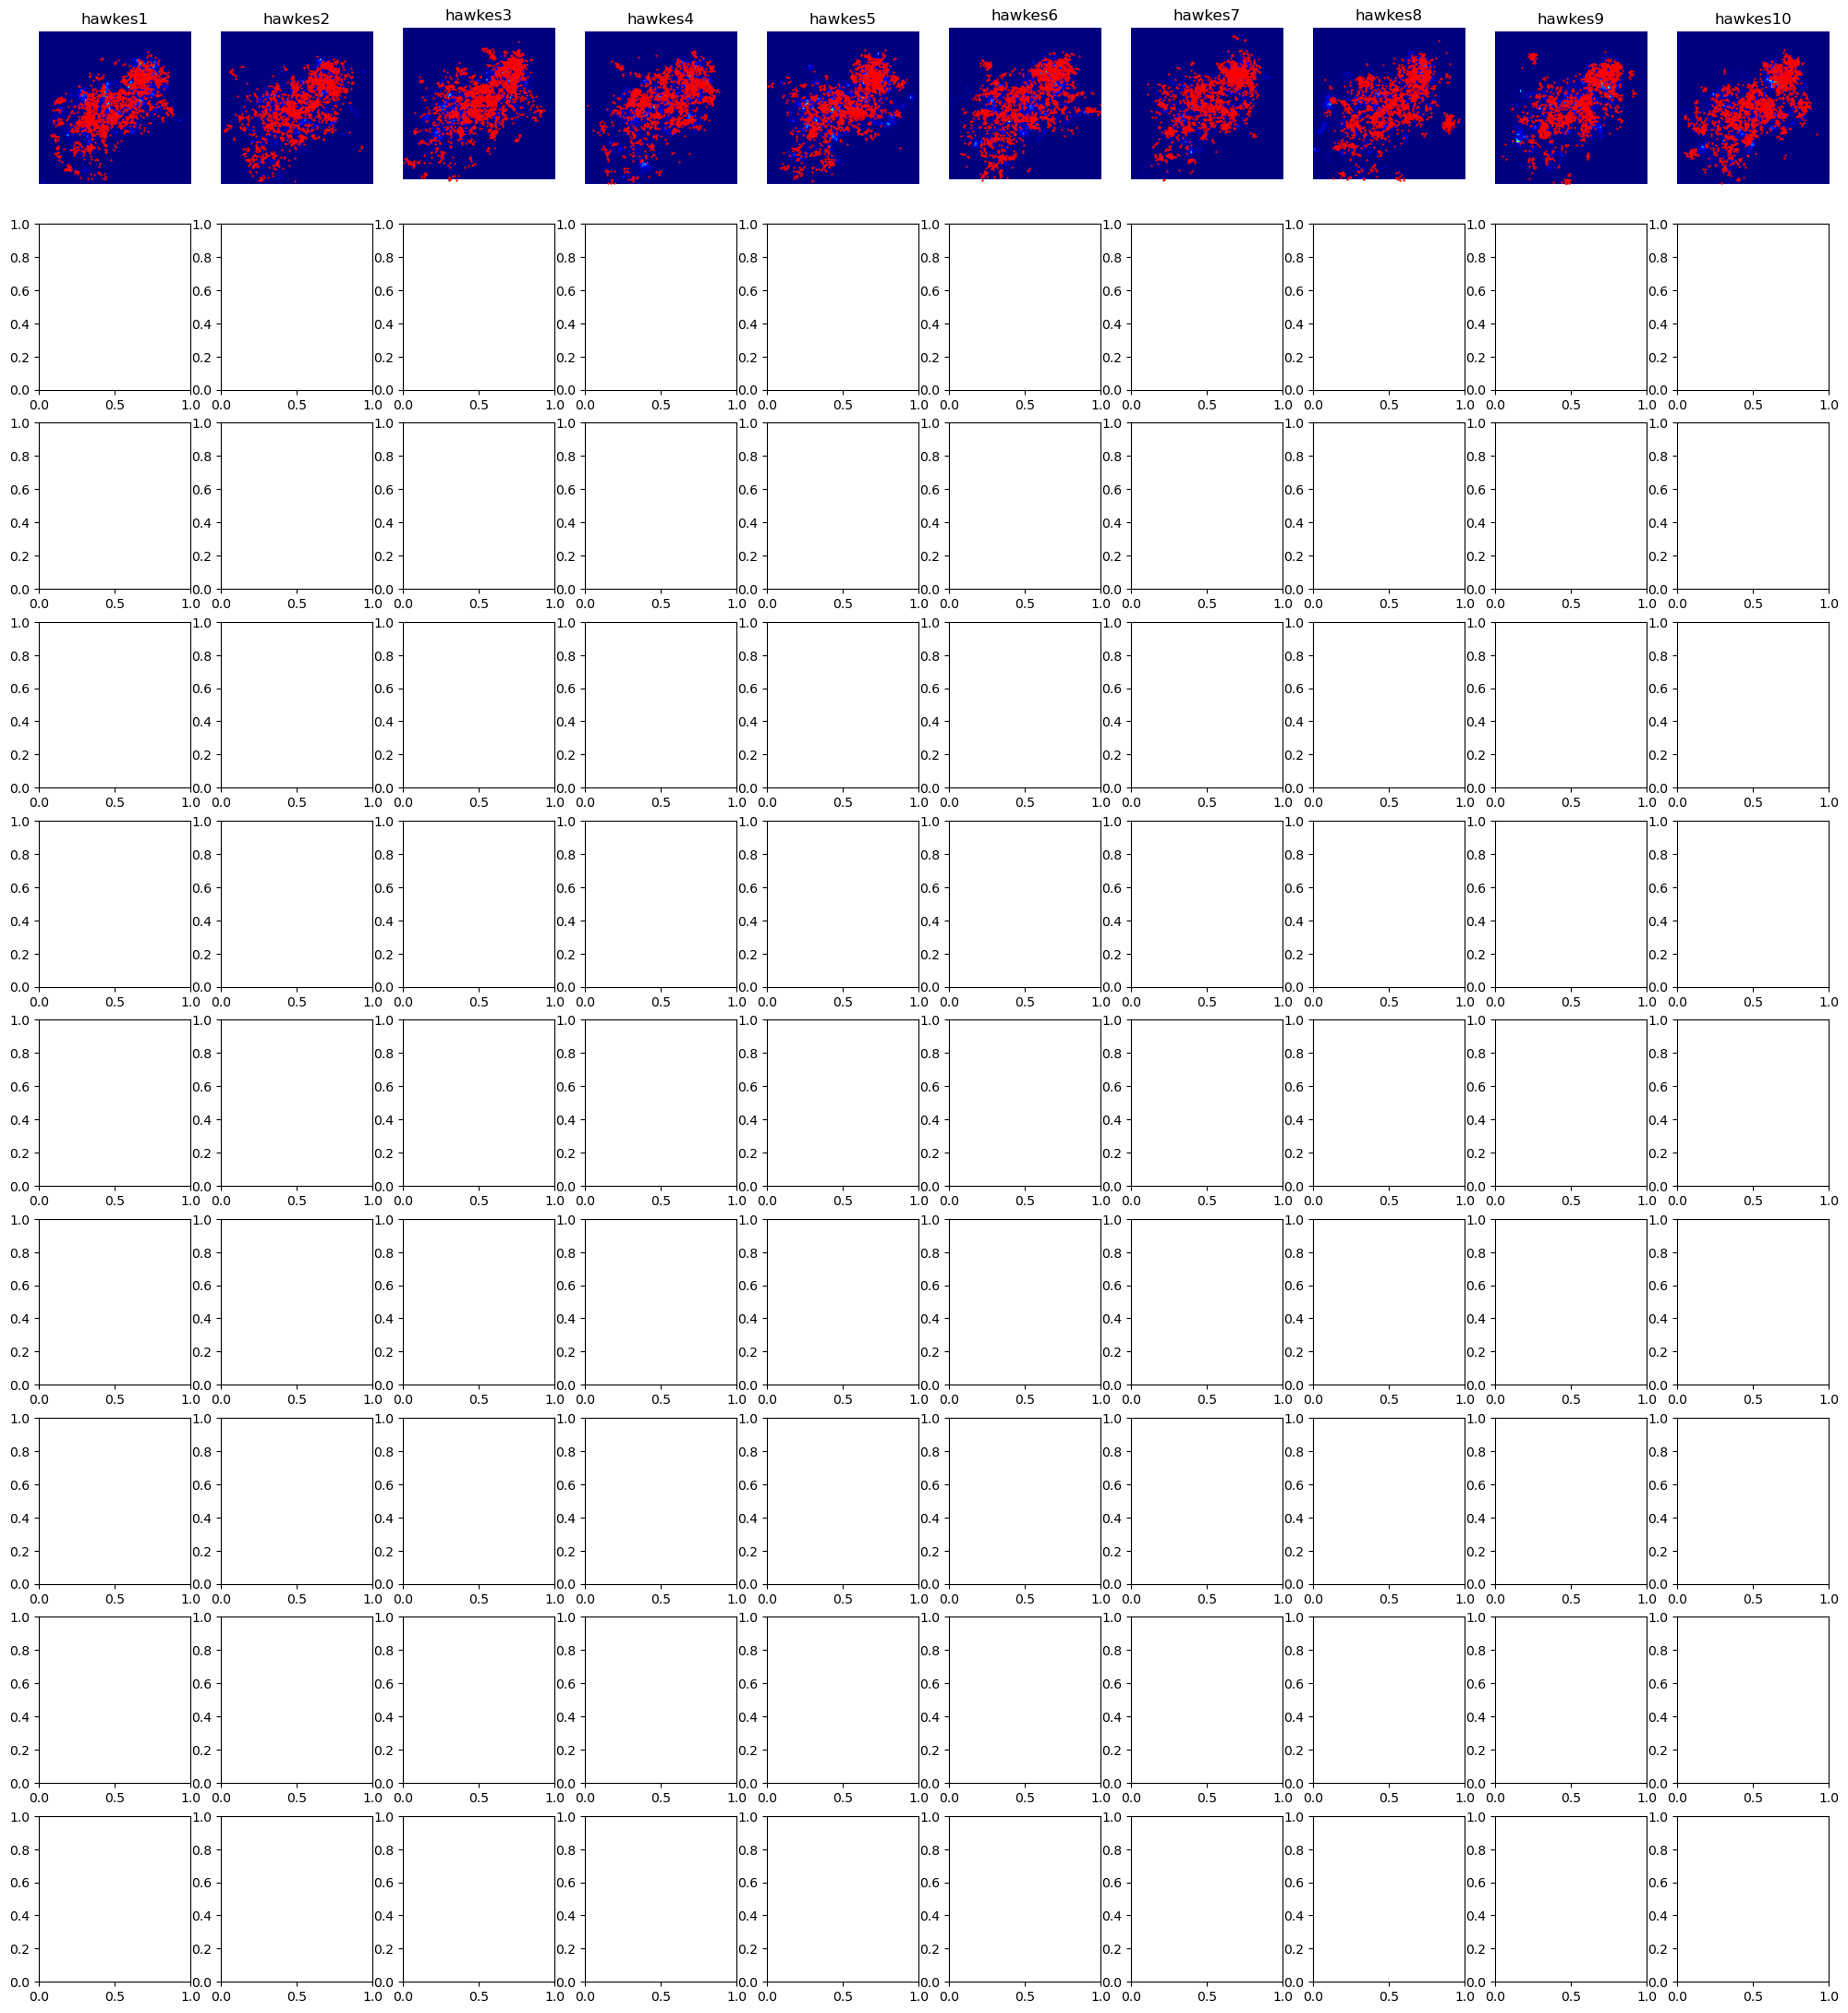

In [180]:
fig, axs = plt.subplots(10, 10, figsize=(25, 27.5))

for i in range(n_classes):
    for j in range(n_examples):
        axs[i, j].imshow(sim_rhos[i][j],  cmap='jet') #vmin=0, vmax=sim_rhos.max(),
        axs[i, j].scatter(sim_patterns[i][j]['x'] * 128, 
                          sim_patterns[i][j]['y'] * 128, s=0.5, color='red')
        axs[i, j].set_title(process[i] + str(j + 1))
        axs[i, j].axis('off')
#fig.savefig('simrhos.pdf', bbox_inches='tight')

In [8]:
X = sim_imgs / sim_imgs.max()
y = []
for i in range(n_classes * n_examples *  grid_nt * grid_nx * grid_ny): 
    y.append(int(i / (n_examples * grid_nt * grid_nx * grid_ny)))
y = np.asarray(y)
y = y.reshape([n_classes * n_examples * grid_nt*grid_nx * grid_ny, 1])
print(y.shape)

(1638400, 1)


In [9]:
#Pick Up here

import numpy.random as rng
n_test = 3


#Rearranged?

Xtrain = np.zeros([n_classes, n_examples - n_test, grid_ny, grid_nx,grid_nt])
Xval = np.zeros([n_classes, n_test, grid_ny, grid_nx,grid_nt])

for i in range(n_classes):
    val_idx = np.random.choice(n_examples, size=n_test, replace=False)
    Xtrain[i, :, :, :,:] = np.delete(X[i, :, :, :, :], val_idx, axis=0)
    Xval[i, :, :, :, :] = X[i, val_idx, :, :, :]

print(Xtrain.shape)
print(Xval.shape)

ytrain = []
for i in range(n_classes * (n_examples - n_test) *  grid_ny * grid_nx * grid_nt): 
    ytrain.append(int(i / ((n_examples - n_test) * grid_ny * grid_nx * grid_nt)))
ytrain = np.asarray(ytrain)
ytrain = ytrain.reshape([n_classes * (n_examples - n_test) * grid_ny * grid_nx*grid_nt, 1])
yval = []
for i in range(n_classes * n_test *  grid_ny * grid_nx*grid_nt): 
    yval.append(int(i / (n_test * grid_ny * grid_nx*grid_nt)))
yval = np.asarray(yval)
yval = yval.reshape([n_classes * n_test * grid_ny * grid_nx*grid_nt, 1])

print(ytrain.shape)
print(yval.shape)

(1, 7, 128, 128, 10)
(1, 3, 128, 128, 10)
(1146880, 1)
(491520, 1)


(14680064, 1)


NameError: name 'n_test' is not defined

In [183]:
def get_batch(batch_size, s = "train"):
    """
    Create batch of n pairs, half same class, half different class
    """
    if s == 'train':
        X = Xtrain
        categories = ytrain
    else:
        X = Xval
        categories = yval
    n_c, n_e, h, w = X.shape
    
    # randomly sample several classes to use in the batch
    categories = rng.choice(n_c, size=(batch_size,), replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w, 1)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size // 2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_e)
        pairs[0][i, :, :, :] = X[category, idx_1].reshape(h, w, 1)
        idx_2 = rng.randint(0, n_e)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1, n_c)) % n_c
        
        pairs[1][i, :, :, :] = X[category_2, idx_2].reshape(h, w, 1)
    
    return pairs, targets

In [184]:
from tensorflow.keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.constraints import Constraint
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import tensorflow as tf
print(tf.__version__)

2.12.0


In [186]:
def make_oneshot_task(N, s="val"):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = ytrain
    else:
        X = Xval
        categories = yval
    n_classes, n_examples, h, w = X.shape
    
    categories = rng.choice(range(n_classes), size=(N,), replace=False)            
    indices = rng.randint(0, n_examples, size=(N,))
    
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples, replace=False, size=(2,))
    test_image = np.asarray([X[true_category, ex1,:,:]] * N).reshape(N, h, w, 1)
    indices[0] = ex2
    support_set = X[categories, indices, :, :]
    #support_set[0, :, :] = X[true_category, ex2]
    support_set = support_set.reshape(N, h, w, 1)
    targets = np.zeros((N,))
    targets[0] = 1
   # targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image, support_set]
    ## aj
    cat = categories
    ind = [ex1, indices]
    ## aj
    return pairs, targets, cat, ind

  
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k, N))
    for i in range(k):
        inputs, targets, __, __ = make_oneshot_task(N, s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct += 1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

[3 5 5 3 0 5 0]
[0 0 0 0 0 0 0]
1
4


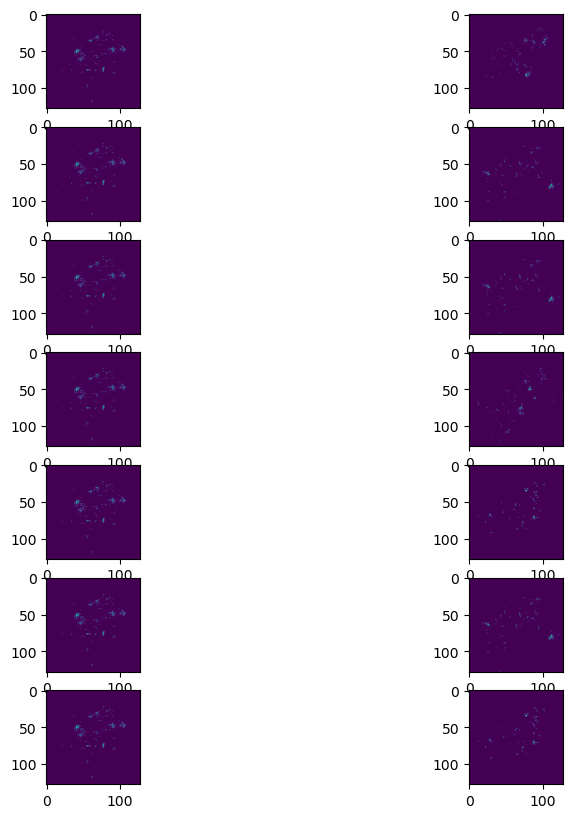

In [191]:
iii = rng.randint(0, 6, size=(7,))
jjj = rng.choice(range(n_classes), size=(7,), replace=True) 
eii1, eii2 = rng.choice(6, replace=False, size=(2,))
print(iii)
print(jjj)
print(eii1)
print(eii2)
#
Xtrain[jjj[0], iii, :, :].shape
aaa = np.asarray([Xtrain[jjj[0], eii1,:,:]] * 7).reshape(7, grid_ny, grid_nx,grid_nt, 1)
aaa.shape
bbb = Xtrain[jjj, iii, :, :]
bbb[0, :, :] = Xtrain[jjj[0], eii2, :, :]
bbb = bbb.reshape(7, grid_ny, grid_nx, grid_nt,1)
fig, axs = plt.subplots(7, 2, figsize=(10, 10))
for i in range(7):
    axs[i, 0].imshow(aaa[i, :, :, 0])
    axs[i, 1].imshow(bbb[i, :, :, 0])

In [192]:
a, b, c, d = make_oneshot_task(7)
c[1].shape == b.shape
d

ValueError: too many values to unpack (expected 4)

In [193]:
X.shape

(1, 10, 128, 128, 10)

In [40]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Dropout(rate=0.2))
    model.add(Conv2D(filters=8, kernel_size=(9, 9), strides=1, 
                     padding='valid', activation='relu', input_shape=input_shape,
                     kernel_regularizer=l2(5e-4), #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                     ))
    model.add(MaxPooling2D(pool_size=(3, 3), padding='valid'))
    model.add(Dropout(rate=0.2))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, 
                     padding='valid', activation='relu',
                     kernel_regularizer=l2(5e-4),  #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                      ))
    model.add(MaxPooling2D(pool_size=(3, 3), padding='valid'))
#    model.add(Dropout(rate=0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, 
                     padding='valid', activation='relu',
                     kernel_regularizer=l2(5e-4), #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                      ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(256, activation='sigmoid', use_bias=True,
                    kernel_regularizer=l2(1e-4)#,
                    ))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1, activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)
    
    # return the model
    return siamese_net

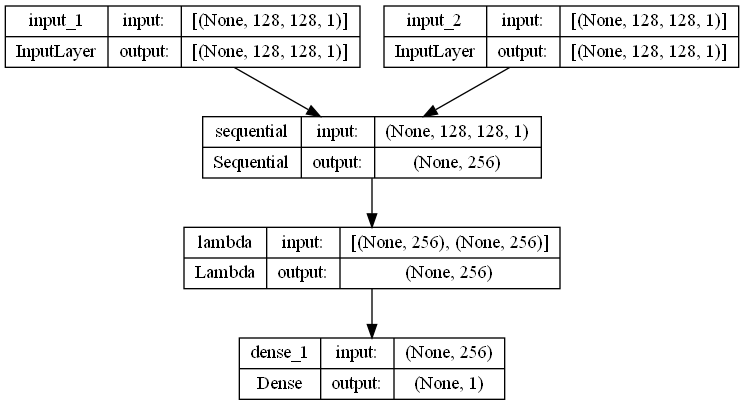

In [41]:
input_shape = (grid_ny, grid_nx, 1)
model = get_siamese_model(input_shape)
plot_model(model, show_shapes=True, show_layer_names=True)

In [42]:
optimizer =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 256)          213568      ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

In [43]:
def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'bias_initializer'):
            layer.bias.initializer.run(session=session)
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
# reset_weights(model) # for multiple running
# model.get_weights()

In [44]:
import time

model_path = './weights/'

# Hyper parameters
evaluate_every = 100 # interval for evaluating on one-shot tasks
batch_size = 10
n_iter = 5000 # No. of training iterations
N_way = 10 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

loss = np.zeros(n_iter)
val_acc, train_acc = [], []
val_index = 0
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(n_iter):
    (inputs, targets) = get_batch(batch_size)
    loss[i] = model.train_on_batch(inputs, targets)
    #if (i + 1) % 2 == 0:
    K.set_value(model.optimizer.lr, K.get_value(model.optimizer.lr) * 0.99)
    if (i + 1) % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i + 1, (time.time() - t_start)/60.0))
        print("Train Loss: {0}".format(loss[i]))
        print("Learning Rate: {0}".format(K.eval(model.optimizer.lr)))
        val_acc.append(test_oneshot(model, N_way, n_val, verbose=True))
        train_acc.append(test_oneshot(model, N_way, n_val, s='train', verbose=True))
        #model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc[val_index] >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc[val_index], best))
            best = val_acc[val_index]
        val_index += 1

val_acc = np.array(val_acc)

Starting training process!
-------------------------------------

 ------------- 

Time for 100 iterations: 0.16682626008987428 mins
Train Loss: 0.6379744410514832
Learning Rate: 0.00036603244370780885
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 49ms/step
Got an average of 49.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step
Got an average of 48.4% 10 way one-shot learning accuracy 

Current best: 49.6, previous best: -1

 ------------- 

Time for 200 iterations: 0.8856513619422912 mins
Train Loss: 0.5130124688148499
Learning Rate: 0.00013397970178630203
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step
Got an average of 54.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 50ms/step
Got an average of 56.8% 10 way one-shot learning accuracy 

Current best: 54.0, previous best: 49.6

 ------------- 

Time for 300 iterations: 1.7662904183069865 mins
Train Loss: 0.34467679262161255
Learning Rate: 4.904089655610733e-05
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step
Got an average of 45.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 41ms/step
Got an average of 62.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 400 iterations: 2.6725911776224773 mins
Train Loss: 0.42159050703048706
Learning Rate: 1.7950549590750597e-05
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step
Got an average of 44.8% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 48ms/step
Got an average of 59.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 500 iterations: 3.568326989809672 mins
Train Loss: 0.46157798171043396
Learning Rate: 6.5704825829016045e-06
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 42ms/step
Got an average of 42.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 56ms/step
Got an average of 64.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 600 iterations: 4.459489603837331 mins
Train Loss: 0.5386213064193726
Learning Rate: 2.405008672212716e-06
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 45ms/step
Got an average of 39.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 54ms/step
Got an average of 65.2% 10 way one-shot learning accuracy 


 ------------- 

Time for 700 iterations: 5.375391678015391 mins
Train Loss: 0.5542119741439819
Learning Rate: 8.803106652521819e-07
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 50ms/step
Got an average of 45.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 48ms/step
Got an average of 64.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 800 iterations: 6.328597597281138 mins
Train Loss: 0.5888804197311401
Learning Rate: 3.222222062504443e-07
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step
Got an average of 48.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 56ms/step
Got an average of 59.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 900 iterations: 7.391164879004161 mins
Train Loss: 0.3619045317173004
Learning Rate: 1.1794376320040101e-07
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 99ms/step
Got an average of 44.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 128ms/step
Got an average of 63.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 1000 iterations: 8.839634970823925 mins
Train Loss: 0.33986997604370117
Learning Rate: 4.31712336990131e-08
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 115ms/step
Got an average of 44.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 112ms/step
Got an average of 61.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 1100 iterations: 10.547736275196076 mins
Train Loss: 0.5322344303131104
Learning Rate: 1.5802061881231566e-08
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 115ms/step
Got an average of 41.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 122ms/step
Got an average of 62.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 1200 iterations: 12.380216936270395 mins
Train Loss: 0.6152151823043823
Learning Rate: 5.784067891312361e-09
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 129ms/step


1/1 [==============================] - 0s 126ms/step
Got an average of 42.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 138ms/step
Got an average of 60.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 1300 iterations: 14.339987198511759 mins
Train Loss: 0.47230440378189087
Learning Rate: 2.117155339931287e-09
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 141ms/step
Got an average of 39.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 147ms/step
Got an average of 66.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 1400 iterations: 16.454145912329356 mins
Train Loss: 0.5704889893531799
Learning Rate: 7.749475505747228e-10
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 144ms/step
Got an average of 43.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 144ms/step
Got an average of 65.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 1500 iterations: 18.61462510426839 mins
Train Loss: 0.4036281108856201
Learning Rate: 2.8365584880951644e-10
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 147ms/step
Got an average of 46.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 157ms/step
Got an average of 60.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 1600 iterations: 20.87008159160614 mins
Train Loss: 0.47254419326782227
Learning Rate: 1.0382719684010056e-10
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 155ms/step
Got an average of 38.8% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 167ms/step
Got an average of 61.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 1700 iterations: 23.21747761964798 mins
Train Loss: 0.5362036824226379
Learning Rate: 3.800411374488277e-11
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 176ms/step
Got an average of 40.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 185ms/step
Got an average of 61.2% 10 way one-shot learning accuracy 


 ------------- 

Time for 1800 iterations: 25.717672419548034 mins
Train Loss: 0.42258793115615845
Learning Rate: 1.3910731073984994e-11
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 201ms/step
Got an average of 43.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 175ms/step
Got an average of 56.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 1900 iterations: 28.406135396162668 mins
Train Loss: 0.5264108777046204
Learning Rate: 5.091777260241015e-12
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 189ms/step
Got an average of 46.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 195ms/step
Got an average of 60.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 2000 iterations: 31.206113847096763 mins
Train Loss: 0.585271954536438
Learning Rate: 1.8637550270456105e-12
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 200ms/step
Got an average of 40.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 204ms/step
Got an average of 65.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 2100 iterations: 34.0636536916097 mins
Train Loss: 0.4818021357059479
Learning Rate: 6.821943726066648e-13
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 207ms/step
Got an average of 42.8% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 213ms/step


1/1 [==============================] - 0s 204ms/step
Got an average of 60.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 2200 iterations: 37.059679448604584 mins
Train Loss: 0.48471251130104065
Learning Rate: 2.497052315354048e-13
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 204ms/step
Got an average of 44.8% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 221ms/step
Got an average of 63.2% 10 way one-shot learning accuracy 


 ------------- 

Time for 2300 iterations: 40.36959135929744 mins
Train Loss: 0.5065367221832275
Learning Rate: 9.140018792817492e-14
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 213ms/step


1/1 [==============================] - 0s 233ms/step
Got an average of 43.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 227ms/step
Got an average of 62.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 2400 iterations: 43.57396420240402 mins
Train Loss: 0.4123634397983551
Learning Rate: 3.3455412783633606e-14
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 230ms/step
Got an average of 46.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 233ms/step


1/1 [==============================] - 0s 224ms/step
Got an average of 55.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 2500 iterations: 46.888368888696036 mins
Train Loss: 0.5628823041915894
Learning Rate: 1.2245762841527497e-14
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 242ms/step


1/1 [==============================] - 0s 241ms/step
Got an average of 35.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 250ms/step
Got an average of 56.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 2600 iterations: 50.32687443494797 mins
Train Loss: 0.3729992210865021
Learning Rate: 4.4823471614886725e-15
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 256ms/step


1/1 [==============================] - 0s 257ms/step
Got an average of 48.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 253ms/step
Got an average of 60.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 2700 iterations: 53.95019407272339 mins
Train Loss: 0.5718807578086853
Learning Rate: 1.6406841841067402e-15
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 254ms/step


1/1 [==============================] - 0s 255ms/step
Got an average of 42.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 262ms/step
Got an average of 62.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 2800 iterations: 57.71211748917897 mins
Train Loss: 0.41286787390708923
Learning Rate: 6.00543500867102e-16
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 271ms/step
Got an average of 40.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 



1/1 [==============================] - 0s 282ms/step
Got an average of 56.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 2900 iterations: 61.69698380629222 mins
Train Loss: 0.603531539440155
Learning Rate: 2.1981823176273258e-16
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 270ms/step


1/1 [==============================] - 0s 294ms/step
Got an average of 44.8% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 267ms/step


1/1 [==============================] - 0s 291ms/step
Got an average of 63.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 3000 iterations: 65.80004014571507 mins
Train Loss: 0.5698611736297607
Learning Rate: 8.046061918919655e-17
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 290ms/step


1/1 [==============================] - 0s 291ms/step
Got an average of 46.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 295ms/step
Got an average of 62.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 3100 iterations: 70.09086882670721 mins
Train Loss: 0.4219411015510559
Learning Rate: 2.9451189992244213e-17
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 303ms/step
Got an average of 44.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 321ms/step


1/1 [==============================] - 0s 301ms/step
Got an average of 62.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 3200 iterations: 74.55947632392248 mins
Train Loss: 0.449601411819458
Learning Rate: 1.0780085749309524e-17
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 400ms/step


1/1 [==============================] - 0s 322ms/step
Got an average of 46.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 351ms/step
Got an average of 58.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 3300 iterations: 79.32154233058294 mins
Train Loss: 0.430950790643692
Learning Rate: 3.945857903440774e-18
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 348ms/step


1/1 [==============================] - 0s 350ms/step
Got an average of 44.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 335ms/step


1/1 [==============================] - 0s 345ms/step
Got an average of 56.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 3400 iterations: 84.32013943592708 mins
Train Loss: 0.5400784611701965
Learning Rate: 1.4443113230525554e-18
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 340ms/step
Got an average of 42.8% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 343ms/step


1/1 [==============================] - 0s 334ms/step
Got an average of 60.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 3500 iterations: 89.45604173342387 mins
Train Loss: 0.5609116554260254
Learning Rate: 5.286647262639588e-19
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 370ms/step


1/1 [==============================] - 0s 351ms/step
Got an average of 43.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 373ms/step


1/1 [==============================] - 0s 377ms/step
Got an average of 59.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 3600 iterations: 94.67143752972285 mins
Train Loss: 0.4503287672996521
Learning Rate: 1.9350842237745613e-19
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 381ms/step


1/1 [==============================] - 0s 367ms/step
Got an average of 41.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 390ms/step
Got an average of 60.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 3700 iterations: 100.17307872772217 mins
Train Loss: 0.42942434549331665
Learning Rate: 7.083034494192203e-20
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 384ms/step


1/1 [==============================] - 0s 389ms/step
Got an average of 40.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 395ms/step


1/1 [==============================] - 1s 617ms/step
Got an average of 58.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 3800 iterations: 106.19634497960409 mins
Train Loss: 0.4804592728614807
Learning Rate: 2.592619915462737e-20
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 395ms/step


1/1 [==============================] - 0s 409ms/step
Got an average of 46.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 422ms/step


1/1 [==============================] - 0s 415ms/step
Got an average of 60.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 3900 iterations: 112.21619524558385 mins
Train Loss: 0.5057938098907471
Learning Rate: 9.489825538546775e-21
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 430ms/step


1/1 [==============================] - 0s 424ms/step
Got an average of 40.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 428ms/step
Got an average of 67.2% 10 way one-shot learning accuracy 


 ------------- 

Time for 4000 iterations: 118.4645340124766 mins
Train Loss: 0.3867133557796478
Learning Rate: 3.473583827599834e-21
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 478ms/step


1/1 [==============================] - 0s 462ms/step
Got an average of 41.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 435ms/step
Got an average of 58.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 4100 iterations: 124.93512099186579 mins
Train Loss: 0.559062659740448
Learning Rate: 1.271443749334256e-21
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 447ms/step


1/1 [==============================] - 0s 449ms/step
Got an average of 43.6% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 619ms/step


1/1 [==============================] - 0s 447ms/step
Got an average of 55.6% 10 way one-shot learning accuracy 


 ------------- 

Time for 4200 iterations: 131.78838073412578 mins
Train Loss: 0.47762417793273926
Learning Rate: 4.653894629117711e-22
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 457ms/step
Got an average of 41.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 461ms/step
Got an average of 58.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 4300 iterations: 138.4455358306567 mins
Train Loss: 0.46971917152404785
Learning Rate: 1.703475326411881e-22
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 479ms/step


1/1 [==============================] - 0s 470ms/step
Got an average of 44.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 467ms/step


1/1 [==============================] - 0s 476ms/step
Got an average of 56.0% 10 way one-shot learning accuracy 


 ------------- 

Time for 4400 iterations: 145.28192171653112 mins
Train Loss: 0.5199502110481262
Learning Rate: 6.235270190837229e-23
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 473ms/step


1/1 [==============================] - 0s 493ms/step
Got an average of 47.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 524ms/step


1/1 [==============================] - 0s 497ms/step
Got an average of 59.2% 10 way one-shot learning accuracy 


 ------------- 

Time for 4500 iterations: 152.52967845201493 mins
Train Loss: 0.5314357280731201
Learning Rate: 2.282309336246999e-23
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 507ms/step
Got an average of 44.4% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 0s 497ms/step


1/1 [==============================] - 1s 511ms/step
Got an average of 56.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 4600 iterations: 159.8568574388822 mins
Train Loss: 0.5896472930908203
Learning Rate: 8.353990443497107e-24
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 510ms/step


1/1 [==============================] - 1s 539ms/step
Got an average of 38.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 539ms/step


1/1 [==============================] - 1s 531ms/step
Got an average of 62.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 4700 iterations: 167.53248658180237 mins
Train Loss: 0.6187039017677307
Learning Rate: 3.057830366902452e-24
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 539ms/step


1/1 [==============================] - 1s 543ms/step
Got an average of 42.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 556ms/step


1/1 [==============================] - 1s 556ms/step
Got an average of 64.8% 10 way one-shot learning accuracy 


 ------------- 

Time for 4800 iterations: 175.56364825963973 mins
Train Loss: 0.5515101552009583
Learning Rate: 1.1192650401810647e-24
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 582ms/step
Got an average of 44.0% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 578ms/step


1/1 [==============================] - 1s 586ms/step
Got an average of 55.2% 10 way one-shot learning accuracy 


 ------------- 

Time for 4900 iterations: 184.03308157126108 mins
Train Loss: 0.6314007043838501
Learning Rate: 4.0968704716938356e-25
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 612ms/step


1/1 [==============================] - 1s 584ms/step
Got an average of 51.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 620ms/step


1/1 [==============================] - 1s 600ms/step
Got an average of 60.4% 10 way one-shot learning accuracy 


 ------------- 

Time for 5000 iterations: 192.8313316186269 mins
Train Loss: 0.460673987865448
Learning Rate: 1.499586123856014e-25
Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 619ms/step


1/1 [==============================] - 1s 633ms/step
Got an average of 47.2% 10 way one-shot learning accuracy 

Evaluating model on 250 random 10 way one-shot learning tasks ... 

1/1 [==============================] - 1s 700ms/step


1/1 [==============================] - 1s 637ms/step
Got an average of 59.2% 10 way one-shot learning accuracy 



54.0


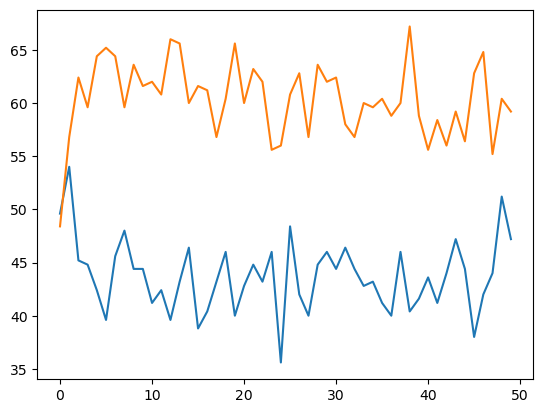

In [45]:
plt.plot(val_acc, label='valid')
plt.plot(train_acc, label='train')
print(best)